In [1]:
import boto3
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
dynamodb = boto3.resource('dynamodb', region_name='ap-northeast-1')
table = dynamodb.Table('dynamodb-env-keisuke-nakata')
ret = table.scan()
df = pd.DataFrame(data=ret['Items'])
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')

In [3]:
df.head()

,date,ambient,co2_ndir,co2_pas,humidity,address,voc,temperature,dust,room
0,2021-11-01 12:53:27,430,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,86,26.430206298828125,0,NaN
1,2021-11-01 12:54:06,430,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,87,26.430206298828125,0,NaN
2,2021-11-01 12:54:38,444,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,98,26.430206298828125,0,NaN
3,2021-11-01 12:55:11,444,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,93,26.430206298828125,0,NaN
4,2021-11-01 12:55:43,463,5000,586,43.5333251953125,85:a5:ca:78:5c:a4,94,26.430206298828125,0,NaN


# 隔離部屋

In [4]:
df_work = df[df['room'] == 'work']
df_work = df[df['date'] > '2021-11-01 21:39:00']
df_work.head()

,date,ambient,co2_ndir,co2_pas,humidity,address,voc,temperature,dust,room
45,2021-11-01 21:39:06,143,0,1039,56.04248046875,85:a5:ca:78:5c:a4,15,23.7652587890625,0,work
46,2021-11-01 21:39:38,143,0,1061,57.6171875,85:a5:ca:78:5c:a4,17,23.554306030273438,0,work
47,2021-11-01 21:40:11,142,0,1060,58.6090087890625,85:a5:ca:78:5c:a4,27,23.51959228515625,0,work
48,2021-11-01 21:40:43,142,0,1074,59.344482421875,85:a5:ca:78:5c:a4,39,23.492889404296875,0,work
49,2021-11-01 21:41:16,140,0,1084,59.64508056640625,85:a5:ca:78:5c:a4,50,23.51959228515625,0,work


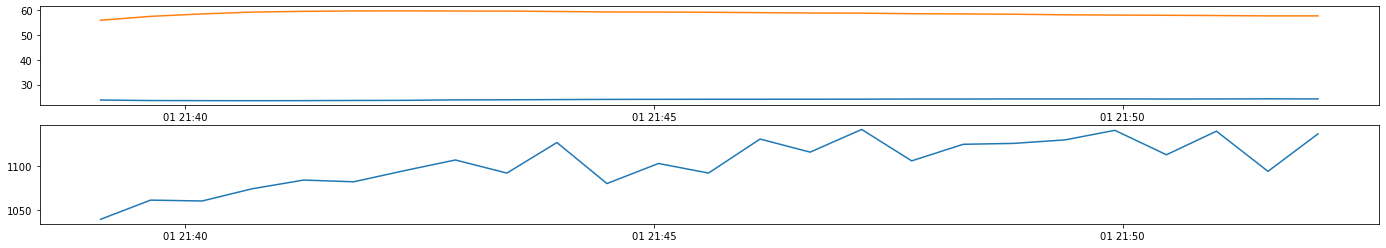

In [5]:
plt.figure(figsize=(24, 4))

plt.subplot(2,1,1)
plt.plot(df_work['date'], df_work[['temperature', 'humidity']])
 
plt.subplot(2,1,2)
plt.plot(df_work['date'], df_work[['co2_pas']])

# トイレ